In [1]:
import os 

import fiona #must be import before geopandas
import geopandas as gpd
import rasterio
import rioxarray
import re
import rtree
import shapely
import pickle

#from cartopy import crs
import collections
import cv2
import math
from glob import glob
from tqdm.notebook import tqdm_notebook
import tqdm
# Standard packages
import tempfile
import warnings
import urllib
import shutil

# Less standard, but still pip- or conda-installable
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from lxml.etree import Element,SubElement,tostring
import xml.dom.minidom
from xml.dom.minidom import parseString
import xml.etree.ElementTree as et
from xml.dom import minidom

#import requests
from PIL import Image
from io import BytesIO
import tqdm
from skimage.metrics import structural_similarity as compare_ssim
import imutils

import psutil

import data_eng.az_proc as ap
import data_eng.form_calcs as fc

In [3]:
import os 

import fiona #must be import before geopandas
import geopandas as gpd
import rasterio
import rioxarray
import re
import rtree
import shapely
from shapely.geometry import Polygon, Point, MultiPoint, MultiPolygon, MultiLineString
import pickle

#from cartopy import crs
import collections
import cv2
import math
from glob import glob
from tqdm.notebook import tqdm_notebook
import tqdm
# Standard packages
import tempfile
import warnings
import urllib
import shutil

# Less standard, but still pip- or conda-installable
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from lxml.etree import Element,SubElement,tostring
import xml.dom.minidom
from xml.dom.minidom import parseString
import xml.etree.ElementTree as et
from xml.dom import minidom

#import requests
from PIL import Image
from io import BytesIO
import tqdm
from skimage.metrics import structural_similarity as compare_ssim
import imutils

import psutil

import data_eng.az_proc as ap
import data_eng.form_calcs as fc

In [28]:
shapely.__version__

'1.7.1'

## File Paths

In [4]:
parent_directory = "//oit-nas-fe13dc.oit.duke.edu//data_commons-borsuk//"

tile_names_tile_urls_complete_array = np.load("image_download_azure/tile_name_tile_url_complete_array.npy")

tiles_labeled = "tile_name_tile_url_labeled.npy"
tiles_labeled_from_complete_set = np.load(tiles_labeled)

tracker_file_path = 'outputs/tile_img_annotation_annotator.npy'
tile_img_annotation = np.load(tracker_file_path)
tile_img_annotation_annotator = np.load("outputs/tile_img_annotation_annotator.npy")

tiles_errors = 'tile_name_tile_url_error_downloading.npy'
tiles_errors = np.load(tiles_errors)

#load tiles and tile xmls
tiles_complete_dataset_path = os.path.join(parent_directory,"complete_dataset","tiles")
os.makedirs(tiles_complete_dataset_path, exist_ok=True)
tiles_dir = tiles_complete_dataset_path

tiles_xml_complete_dataset_path = os.path.join(parent_directory,"complete_dataset","tiles_xml")
os.makedirs(tiles_xml_complete_dataset_path, exist_ok=True)
tiles_xml_dir = tiles_xml_complete_dataset_path
tiles_xml_list = os.listdir(tiles_xml_complete_dataset_path)

tile_names_tile_urls_complete_array_unique_standard_tile_names = np.load("tile_names_tile_urls_complete_array_unique_standard_tile_names.npy")
image_characteristics = pd.read_csv("image_characteristics.csv")
tile_characteristics = pd.read_csv("tile_characteristics.csv")
item_dim = int(512)

#NAIP quad map
quad_indicies_path = "C:/Users/rapiduser/Box/EPA STAR 2019 (Community Resistance to Environmental Disasters)/Data/AST Datasets/MapIndices_National_GDB/MapIndices_National_GDB.gdb"
#fiona.listlayers(quad_indicies_path)
rechipped_image_path = os.path.join(parent_directory,"temp/rechip")

folders_of_images_xmls_by_tile = os.listdir(rechipped_image_path)
images_and_xmls_by_tile_path = rechipped_image_path

tile_characteristics = pd.DataFrame(data={'tile_name': ["m_3308752_nw_16_060_20191023"], 'tile_path': ["//oit-nas-fe13dc.oit.duke.edu//data_commons-bo"], 
                                              'tile_heights': [11375],'tile_widths': [11527], 'tile_depths': [4],
                                              'min_lon_tile': [-87.627585],'min_lat_tile': [33.18537],
                                              'max_lon_tile': [-87.559923],'max_lat_tile': [33.25214]})
                                              
tile_name = 'm_3308752_nw_16_060_20191023'
tiles_xml_list = [tile_name+".xml"]
distance_limit = 5
gdf = fc.merge_tile_annotations(tiles_xml_dir,tile_characteristics, distance_limit, tiles_xml_list)

In [5]:
distance_limit = 5
min_lon,min_lat,max_lon,max_lat = fc.merge_tile_annotations(tiles_xml_dir,tile_characteristics, distance_limit)

100%|██████████| 2120/2120 [00:53<00:00, 39.66it/s]


In [7]:
min_lon,min_lat,max_lon,max_lat

(-104.92330108349235,
 39.77206302492828,
 -104.92325256453574,
 39.77200237623253)

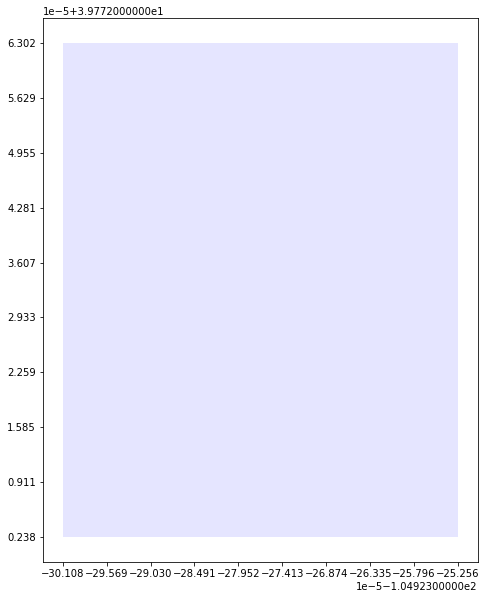

In [14]:
#Polygon([(min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),(max_lon,min_lat)])
lon_point_list = [min_lon, min_lon, max_lon, max_lon]
lat_point_list = [min_lat, max_lat, max_lat, min_lat]
fig,  axs = plt.subplots(figsize = (10,10),sharex= True,sharey= True)
#poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
#polygon = Polygon([(min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),(max_lon,min_lat)])
p = gpd.GeoSeries(polygon_geom)
p.plot(ax=axs, alpha=0.1,color ="blue")
plt.xticks(np.linspace(min_lon, max_lon,10))
plt.yticks(np.linspace(min_lat, max_lat,10))

#plt.gca().invert_yaxis() #https://stackoverflow.com/questions/1349230/matplotlib-coord-sys-origin-to-top-left
plt.show()

In [20]:
Polygon([(min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),(max_lon,min_lat)])

OSError: exception: access violation reading 0xFFFFFFFFFFFFFFFF

In [24]:
Polygon([(min_lon,min_lat),(min_lon,max_lat),(max_lon,max_lat),(max_lon,min_lat),(min_lon,min_lat)])

OSError: exception: access violation reading 0xFFFFFFFFFFFFFFFF

In [18]:
zip(lon_point_list, lat_point_list)

In [14]:
a = np.array([1,2,3])
if a is None:
    print(" ")


In [6]:
#gdf.crs = "EPSG:4326" #assign projection
with open('file.geojson' , 'w') as file:
    file.write(gdf.to_json())

KeyError: 0